## Lecture 14 &mdash; 2025.02.12 &mdash; Demos

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#### Comparison of training and predictive error

In [2]:
def make_data_maker(p=1, sigma=1.0, random_state=42):
    rng = np.random.default_rng(random_state)
    beta = rng.uniform(size=p)

    def make_data(n):  # sample from p
        X = rng.uniform(size=(n, p))
        y = X @ beta + sigma * rng.normal(size=n)
        return X, y

    return make_data, beta

In [3]:
p = 3
sigma = 2
make_data, beta = make_data_maker(p=p, sigma=sigma)

A really bit test set should give a precise estimate of prediction error.

In [4]:
X_test, y_test = make_data(1_000_000)
print(X_test.shape, y_test.shape)

(1000000, 3) (1000000,)


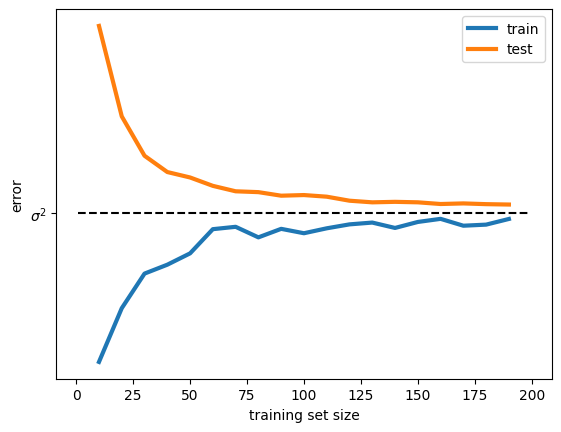

In [5]:
r = 50
ns = np.arange(10, 200, 10)

train_errs = np.zeros((r, len(ns)))
test_errs = np.zeros((r, len(ns)))

for i in range(r):
    for j, n in enumerate(ns):
        X_train, y_train = make_data(n)
        model = LinearRegression()
        model.fit(X_train, y_train)
        train_errs[i, j] = mean_squared_error(y_train, model.predict(X_train))
        test_errs[i, j] = mean_squared_error(y_test, model.predict(X_test))

plt.plot(ns, train_errs.mean(axis=0), lw=3, label="train")
plt.plot(ns, test_errs.mean(axis=0), lw=3, label="test")
plt.plot(plt.xlim(), [sigma**2, sigma**2], "k--")
plt.xlabel("training set size")
plt.ylabel("error")
plt.yticks([sigma**2], ["$\\sigma^2$"])
plt.legend()
plt.show()

#### Data splitting to estimate predictive error

In [6]:
auto = (
    pd.read_csv("../data/auto.csv", na_values=["?"], dtype={"origin": "category"})
    .drop(columns=["name"])
    .dropna()
)

origin = auto.pop("origin")
auto["european"] = origin == "2"
auto["japanese"] = origin == "3"
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,european,japanese
0,18.0,8,307.0,130.0,3504,12.0,70,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,False,False
393,44.0,4,97.0,52.0,2130,24.6,82,True,False
394,32.0,4,135.0,84.0,2295,11.6,82,False,False
395,28.0,4,120.0,79.0,2625,18.6,82,False,False


In [7]:
X = auto.copy()
y = X.pop("mpg")

In [10]:
r = 1000
test_size = 0.5

train_errs = np.zeros(r)
test_errs = np.zeros(r)

model = LinearRegression()

for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    train_errs[i] = mean_squared_error(y_train, model.predict(X_train))
    test_errs[i] = mean_squared_error(y_test, model.predict(X_test))

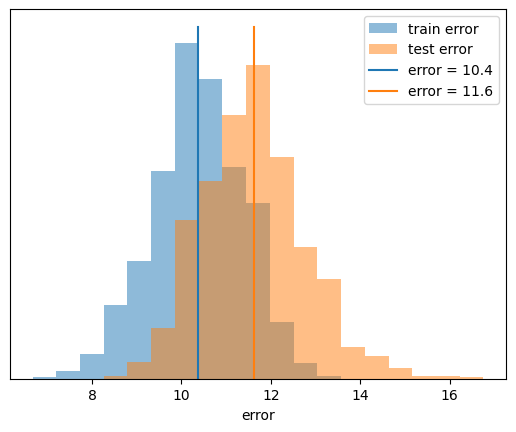

In [11]:
m = np.min([*train_errs, *test_errs])
M = np.max([*train_errs, *test_errs])
bins = np.linspace(m, M, 20)
plt.hist(train_errs, bins=bins, alpha=0.5, label="train error")
plt.hist(test_errs, bins=bins, alpha=0.5, label="test error")
ylim = plt.ylim()
plt.plot(
    [train_errs.mean(), train_errs.mean()],
    ylim,
    color="C0",
    label=f"error = {train_errs.mean():.1f}",
)
plt.plot(
    [test_errs.mean(), test_errs.mean()],
    ylim,
    color="C1",
    label=f"error = {test_errs.mean():.1f}",
)
plt.yticks([])
plt.xlabel("error")
plt.legend()
plt.show()

In [22]:
r = 1000
test_sizes = np.arange(1, 10) / 10

train_errs = np.zeros((len(test_sizes), r))
test_errs = np.zeros((len(test_sizes), r))

model = LinearRegression()

for i, test_size in enumerate(test_sizes):
    for j in range(r):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        model.fit(X_train, y_train)
        train_errs[i] = mean_squared_error(y_train, model.predict(X_train))
        test_errs[i] = mean_squared_error(y_test, model.predict(X_test))

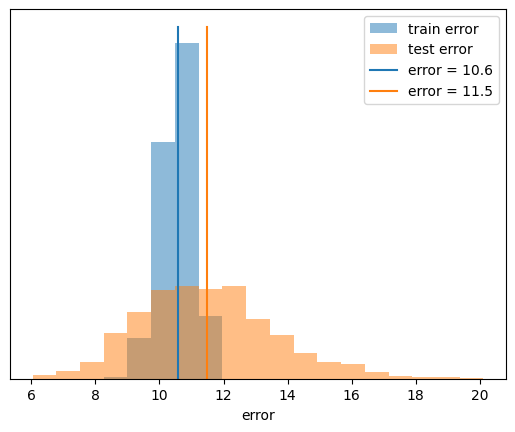

In [21]:
m = np.min([*train_errs, *test_errs])
M = np.max([*train_errs, *test_errs])
bins = np.linspace(m, M, 20)
plt.hist(train_errs, bins=bins, alpha=0.5, label="train error")
plt.hist(test_errs, bins=bins, alpha=0.5, label="test error")
ylim = plt.ylim()
plt.plot(
    [train_errs.mean(), train_errs.mean()],
    ylim,
    color="C0",
    label=f"error = {train_errs.mean():.1f}",
)
plt.plot(
    [test_errs.mean(), test_errs.mean()],
    ylim,
    color="C1",
    label=f"error = {test_errs.mean():.1f}",
)
plt.yticks([])
plt.xlabel("error")
plt.legend()
plt.show()

In [23]:
test_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])